In [1]:
import os
import csv
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
os.getcwd()
path='./database/2024partam/rawimg/'

(2880, 2880, 3)
(1280, 1280)


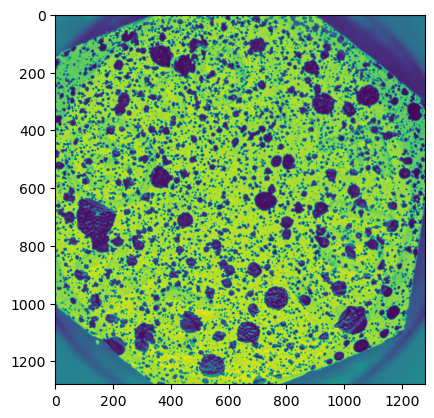

In [9]:
img = cv2.imread(path+'DSC09592.JPG')
print(img.shape)
#img = img[1380:2180,1280:2080] #cam2 
img = img[200:2600,200:2600] #cam1
img = cv2.resize(img, (1280, 1280))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('test.JPG',img)
print(img.shape)
plt.imshow(img)

In [31]:
img_flip_along_x = cv2.flip(img, 0)
cv2.imwrite('./SKR-HEX-20221116/cropped/xy-DSC03370.JPG',img)

True

## resize Picture

In [12]:
for name in os.listdir(path):
    img = cv2.imread(path+name)
    cropped = img[200:2600,200:2600] #Y,X
    img = cv2.resize(cropped, (1200,1200))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('./database/2024partam/cropped/'+name,img)

In [18]:
path='./valid/'
for name in os.listdir(path):
    if name != "Thumbs.db":
        img = cv2.imread(path+name)
        #cropped = img[750:4350,1400:5000] #Y,X
        img = cv2.resize(img, (1200,1200))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(path+name,img)

1
Thumbs.db
xDSC05754.JPG
xDSC05755.JPG
xDSC05756.JPG
xDSC05757.JPG
xDSC05758.JPG
xDSC05759.JPG
xDSC05760.JPG
xDSC05761.JPG
xDSC05762.JPG
xDSC05763.JPG
xDSC05764.JPG
xDSC05765.JPG
xDSC05766.JPG
xDSC05767.JPG
xDSC05768.JPG
xDSC05769.JPG
xDSC05770.JPG
xDSC05771.JPG
xDSC05772.JPG
xDSC05773.JPG
xDSC05774.JPG
xDSC05775.JPG
xDSC05776.JPG
xDSC05777.JPG
xDSC05778.JPG
xDSC05779.JPG
xDSC05780.JPG
xDSC05781.JPG
xDSC05782.JPG
xDSC05783.JPG
xDSC05784.JPG
xDSC05785.JPG
xDSC05786.JPG
xDSC05787.JPG
xDSC05788.JPG
xDSC05789.JPG
xDSC05790.JPG
xDSC05791.JPG
xDSC05792.JPG
xDSC05793.JPG
xDSC05794.JPG
xDSC05795.JPG
xDSC05796.JPG
xDSC05797.JPG
xDSC05798.JPG
xDSC05799.JPG
xDSC05800.JPG
xDSC05801.JPG
xDSC05802.JPG
xDSC05803.JPG
xDSC05804.JPG
xDSC05805.JPG
xDSC05806.JPG
xDSC05807.JPG
xDSC05808.JPG
xDSC05809.JPG
xDSC05810.JPG
xDSC05811.JPG
xDSC05812.JPG
xDSC05813.JPG
xDSC05814.JPG
xDSC05815.JPG
xDSC05816.JPG
xDSC05817.JPG
xDSC05818.JPG
xDSC05819.JPG
xDSC05820.JPG
xDSC05821.JPG
xDSC05822.JPG
xDSC05823.JPG
xDSC0582

# flip pic

In [4]:
import os
import cv2
path='./database/202402preten/inputdata/'
topath='./database/202402preten/augdata/'
for name in os.listdir(path):
    img = cv2.imread(path+name)
    img_flip_along_x = cv2.flip(img, 0)
    img_flip_along_y = cv2.flip(img, 1)
    img_flip_along_xy = cv2.flip(img, -1)
    cv2.imwrite(topath+'x'+name,img_flip_along_x)
    cv2.imwrite(topath+'y'+name,img_flip_along_y)
    cv2.imwrite(topath+'/xy'+name,img_flip_along_xy)
    

In [10]:
import os, random, shutil
def copyFile(fileDir):
        pathDir = os.listdir(fileDir)    #取图片的原始路径
        filenumber=len(pathDir)
        rate=0.4    #自定义抽取图片的比例，比方说100张抽10张，那就是0.1
        picknumber=int(filenumber*rate) #按照rate比例从文件夹中取一定数量图片
        sample = random.sample(pathDir, picknumber)  #随机选取picknumber数量的样本图片
        for name in sample:
                shutil.copy(fileDir+name, tarDir+name)
        return

def data_augmention(fileDir):
        #Sometimes = lambda aug: iaa.Sometimes(0.5, aug)
        aug = iaa.OneOf([
                iaa.AdditiveGaussianNoise(
                        loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5
                ),
                iaa.Add((-20, 20), per_channel=0.5),
                iaa.Multiply((0.5, 1.5), per_channel=0.5),
                iaa.OneOf([iaa.EdgeDetect(alpha=(0, 0.7)),
                           iaa.DirectedEdgeDetect(alpha=(0, 0.7), direction=(0.0, 1.0)),
                       ]),
                iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),
        ])
        for name in os.listdir(fileDir):
                origin_images = cv2.imread(fileDir+name)
                origin_images = cv2.cvtColor(origin_images, cv2.COLOR_BGR2RGB)
                images = np.array([origin_images for _ in range(9)], dtype=np.uint8)
                images_aug = aug(images=images)
                for i in range(9):
                        cv2.imwrite(tarDir+'AUG'+str(i)+name,images_aug[i])
        return

In [11]:
import numpy as np
#from imgaug import augmenters as iaa
#import imgaug as ia
if __name__ == '__main__':
    fileDir ='./database/202404-inkan/output-resize/'    #源图片文件夹路径
    tarDir = './database/202404-inkan/valid-or2/'    #移动到新的文件夹路径
    #data_augmention(fileDir)
    copyFile(fileDir)

In [16]:
f=open('label.csv','w')
for name in os.listdir('./20221110-tcobolt-row/'):
    a=os.path.splitext(name)[0]
    a=a.split('-')[1]
    f.write(a+'\n')
f.close()

FileNotFoundError: [Errno 2] No such file or directory: './20221110-tcobolt-row/'

## split the train vlid test data

In [21]:
import os
import shutil

# 原始图片文件夹路径
source_folder = './database/aug_data/cam1/'
target_folder_tad = './database/train_data/'
target_folder_vad = './database/valid_data/'
target_folder_tsd = './database/test_data/'

# 获取文件夹中的所有文件
files = os.listdir(source_folder)

# 遍历文件夹中的文件
def movefile (source_folder):
    for file in os.listdir(source_folder):
        # 提取文件名中的数字部分
        file_number = int(file[9:-4])
        
        # 根据文件名中的数字将文件复制到对应的文件夹
        if file_number >= 3286:
            target_path = os.path.join(target_folder_tsd, file)
        else:
            target_path = os.path.join(target_folder_tad, file)
        
        # 复制文件
        source_path = os.path.join(source_folder, file)
        shutil.copy(source_path, target_path)

movefile(source_folder)



KeyboardInterrupt: 

## 只显示0-25，90以上的数据

In [4]:
import os, random, shutil
import pandas as pd
import numpy as np

def copypart(dir):

    pathDir = os.listdir(dir)    #取图片的原始路径
    file = pd.read_csv(r'datalabel-2306.csv')
    file=np.array(file)
    f0 = None
    for file_name in pathDir:
        if f0 is None:
            f0 = os.path.join(dir, file_name)
        if file_name != "Thumbs.db":
            for item in file:       #add label, from 1row
                sh = item[1]
                if file_name[-9:-4] == sh[-9:-4] and item[0] > 90:
                    shutil.copy(os.path.join(dir, file_name), os.path.join(todir, file_name))
    return 

In [6]:
dir='./database/aug_data/bolt4/'
todir='./database/aug_data/bolt4-90/'
copypart(dir)